# Week 3: Segmenting and Clustering the city of Toronto

## Using Foursquare API and publicly available data to help entreprenuers open an Italian restaurant
* Analyze Toronto- Use BeautifulSoup to extract data
* Create clusters to analyze the location
* We will be using Folium Maps to plot the data onto the map for visualization

In [1]:
!pip install geopy 

In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install folium

     |████████████████████████████████| 94 kB 6.8 MB/s  eta 0:00:01


In [4]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [5]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests

import random # library for random number generation

In [6]:
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

### Use BeautifulSoup to scrap the web to get Toronto Neighborhood data

In [7]:
source= requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html

tab= str(soup.table)
display_html(tab, raw= True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [8]:
dfs= pd.read_html(tab)
df= dfs[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### We clean and modify the data as per the specificaions laid out in the project 

In [10]:
df =df[df.Borough != 'Not assigned']

df1= df.groupby(['Postal Code', 'Borough'], sort= False).agg(','.join )

df2= df1.reset_index (inplace= False)
df2

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [11]:
df2['Neighbourhood']= np.where(df2['Neighbourhood']=='Not assigned', df2['Borough'], df2['Neighbourhood'])
df2

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [12]:
lat= pd.read_csv('https://cocl.us/Geospatial_data')
lat.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
df3= df2.merge(lat, on= 'Postal Code')
df3.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [14]:
df4= df3[df3['Borough'].str.contains('Toronto', regex= False)]
df4.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


### Creating a visualization of the neighborhoods onto the map of Toronto

In [15]:
map_toronto = folium.Map(location=[43.651070,-79.347015], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df4['Latitude'], df4['Longitude'], df4['Borough'], df4['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Week 4 and 5: Battle of the Neighborhoods :) 

### Inserting Foursqaure ID to import venue data

In [4]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: S11N3NSDRVQGLDGZ1OJYKTFIHK1ARF1JJRAW2KH41L5TIC5P
CLIENT_SECRET:WD5YAXEWL2XHXWD1HB5CUMMJDQ1EXEPYUL3IE5SIDRJP3HWR


In [17]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
toronto_places = getNearbyVenues(names=df4['Neighbourhood'],
                                   latitudes=df4['Latitude'],
                                   longitudes=df4['Longitude'])                                              #Take data from Foursqaure API to return nearby vernues based on Neighbourhood, Latitude and Longitude

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

### Venue data based on the import from Foursquare after cleaning and formating

In [20]:
toronto_places.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [22]:
len(toronto_places['Venue Category'].unique())


229

In [23]:
uni=pd.DataFrame(toronto_places['Venue Category'].unique())
uni.columns= ["Name"]
uni

,Name
0,Coffee Shop
1,Bakery
2,Distribution Center
3,Spa
4,Restaurant
5,Pub
6,Breakfast Spot
7,Park
8,Gym / Fitness Center
9,Historic Site


### Grouping the dataset based on Neighborhood count

In [24]:
b= toronto_places.groupby('Neighborhood').count()
b

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,54,54,54,54,54,54
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,61,61,61,61,61,61
Christie,15,15,15,15,15,15
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34


### Analyzing the neighbourhoods
### We set up the data to perform one-hot encoding

In [25]:
# one hot encoding
onehot = pd.get_dummies(toronto_places[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = toronto_places['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
onehot.shape

(1585, 229)

In [28]:
toronto_grouped= onehot.groupby("Neighborhood").mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.018519,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.018519,0.037037,0.000000,0.000000,0.00,0.018519,0.018519,0.000000,0.037037,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.00,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.018519,0.055556,0.092593,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.018519,0.000000,0.018519,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000

In [29]:
toronto_grouped.shape

(39, 229)

### We explore our data set to see key attributes
### Tabulating the top 7 venues in each location

In [30]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.06
2         Cheese Shop  0.04
3  Seafood Restaurant  0.04
4            Beer Bar  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1  Breakfast Spot  0.09
2       Nightclub  0.09
3     Coffee Shop  0.09
4   Grocery Store  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0    Light Rail Station  0.12
1            Comic Shop  0.06
2      Recording Studio  0.06
3  Fast Food Restaurant  0.06
4            Skate Park  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.20
1       Airport Lounge  0.13
2             Boutique  0.07
3  Rental Car Location  0.07
4              Airport  0.07


----Central Bay Street----
                ve

In [31]:
def return_venues(row, num_top_values):
    row_categories =row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending= False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues = pd.DataFrame(columns=columns)
venues['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    venues.iloc[ind, 1:] = return_venues(toronto_grouped.iloc[ind, :], num_top_venues)

venues.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Restaurant,Cheese Shop,Bakery,Farmers Market
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Pet Store,Stadium,Bar
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Skate Park,Restaurant,Recording Studio,Fast Food Restaurant,Farmers Market,Auto Workshop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Coffee Shop,Harbor / Marina,Rental Car Location,Sculpture Garden,Boutique
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Bubble Tea Shop,Salad Place


In [33]:
toronto1=df4.rename(columns={"Neighbourhood":"Neighborhood"})

In [34]:
kcluster= 5

toronto_clustering= toronto_grouped.drop("Neighborhood", 1)

kmeans= KMeans(n_clusters=kcluster, random_state=0).fit(toronto_clustering)

kmeans.labels_[0:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

### We perform k-means analysis and see that an optimal cluster number of 4 would be ideal for the dataset

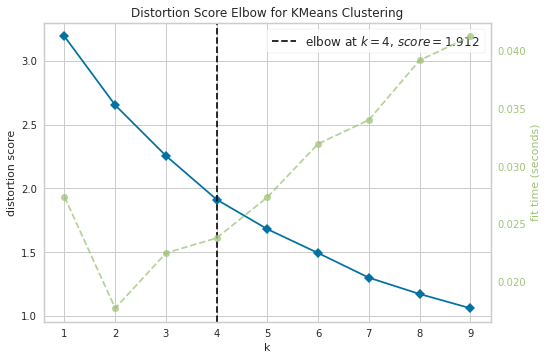

In [69]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(toronto_clustering)        # Fit the data to the visualizer
visualizer.show()

In [70]:
kcluster= 4

toronto_clustering= toronto_grouped.drop("Neighborhood", 1)

kmeans= KMeans(n_clusters=kcluster, random_state=0).fit(toronto_clustering)

kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [77]:
venues= venues.drop(["Cluster Labels"], axis=1)

In [78]:
venues.insert(0, 'Cluster Labels', kmeans.labels_)

In [79]:
toronto1.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


### We merge the cluster labels with the segmented datset based on common locations 

In [80]:
toronto_merged = toronto1

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(venues.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Café,Theater
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Portuguese Restaurant,Sandwich Place,Distribution Center,Burrito Place,Smoothie Shop
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Japanese Restaurant,Cosmetics Shop,Bubble Tea Shop,Italian Restaurant,Middle Eastern Restaurant
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Cocktail Bar,Café,Gastropub,American Restaurant,Clothing Store,Italian Restaurant
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Health Food Store,Pub,Wine Shop,Dance Studio,Eastern European Restaurant,Dumpling Restaurant


In [81]:
map_clusters = folium.Map(location=[43.651070,-79.347015], zoom_start=11) #inserting location of toronto 

# set color scheme for the clusters
x = np.arange(kcluster)
ys = [i + x + (i*x)**2 for i in range(kcluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Now we analyse the dataset to see the statistics of Italian restaurants in the Neighborhood

### We extract the encoded data based on Neighborhood and Italian Restaurant  

In [82]:
mex= toronto_grouped[['Neighborhood','Italian Restaurant']]
mex.head()

,Neighborhood,Italian Restaurant
0,Berczy Park,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.043478
2,"Business reply mail Processing Centre, South C...",0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000
4,Central Bay Street,0.049180


In [83]:
kcluster= 4

mex_clustering= mex.drop("Neighborhood", 1)

kmeans= KMeans(init='k-means++', n_clusters=kcluster, random_state=0).fit(mex_clustering)

kmeans.labels_[0:10]

array([0, 3, 0, 0, 3, 2, 0, 3, 2, 0], dtype=int32)

In [41]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

     |████████████████████████████████| 269 kB 17.1 MB/s eta 0:00:01


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


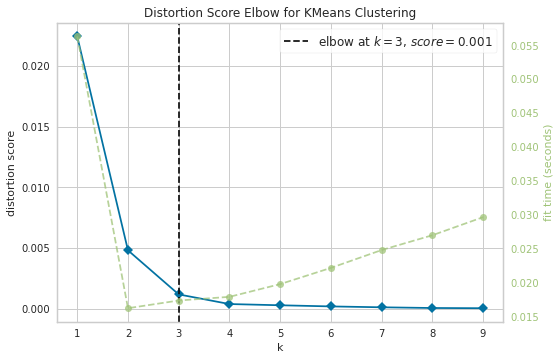

In [42]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(mex_clustering)        # Fit the data to the visualizer
visualizer.show()

### We see the optimal clusters would be 3
### We merge cluster labels with our Neighborhood data and finally super-impose the data on the Toronto map

In [43]:
kcluster= 3

mex_clustering= mex.drop("Neighborhood", 1)

kmeans= KMeans(init='k-means++', n_clusters=kcluster, random_state=0).fit(mex_clustering)

kmeans.labels_[0:10]

array([0, 1, 0, 0, 2, 2, 0, 1, 2, 0], dtype=int32)

In [45]:

mex.insert(0, 'Cluster Labels', kmeans.labels_)

In [46]:
mex_merged = toronto1

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
mex_merged = mex_merged.join(mex.set_index('Neighborhood'), on='Neighborhood')

mex_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,0.000000
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,0.032258
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,0.030000
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,0.025316
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,0.000000


In [47]:
map_clusters = folium.Map(location=[43.651070,-79.347015], zoom_start=11) #inserting location of toronto 

# set color scheme for the clusters
x = np.arange(kcluster)
ys = [i + x + (i*x)**2 for i in range(kcluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mex_merged['Latitude'], mex_merged['Longitude'], mex_merged['Neighborhood'], mex_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
a= mex_merged.loc[mex_merged['Cluster Labels'] == 0, mex_merged.columns[[1] + list(range(5, mex_merged.shape[1]))]]
a

,Borough,Cluster Labels,Italian Restaurant
2,Downtown Toronto,0,0.00
19,East Toronto,0,0.00
20,Downtown Toronto,0,0.00
30,Downtown Toronto,0,0.00
31,West Toronto,0,0.00
61,Central Toronto,0,0.00
62,Central Toronto,0,0.00
67,Central Toronto,0,0.00
68,Central Toronto,0,0.00
73,Central Toronto,0,0.00


In [49]:
b= mex_merged.loc[mex_merged['Cluster Labels'] == 1, mex_merged.columns[[1] + list(range(5, mex_merged.shape[1]))]]
b

,Borough,Cluster Labels,Italian Restaurant
4,Downtown Toronto,1,0.032258
9,Downtown Toronto,1,0.030000
15,Downtown Toronto,1,0.025316
36,Downtown Toronto,1,0.030000
37,West Toronto,1,0.023810
42,Downtown Toronto,1,0.030000
43,West Toronto,1,0.043478
48,Downtown Toronto,1,0.040000
54,East Toronto,1,0.027778
69,West Toronto,1,0.040000


In [50]:
c= mex_merged.loc[mex_merged['Cluster Labels'] == 2, mex_merged.columns[[1] + list(range(5, mex_merged.shape[1]))]]
c

,Borough,Cluster Labels,Italian Restaurant
24,Downtown Toronto,2,0.049180
25,Downtown Toronto,2,0.066667
41,East Toronto,2,0.071429
47,East Toronto,2,0.050000
75,West Toronto,2,0.071429
79,Central Toronto,2,0.058824
81,West Toronto,2,0.062500


In [62]:
data_means= [a["Italian Restaurant"].mean(), b["Italian Restaurant"].mean(), c["Italian Restaurant"].mean()]
ticker= (1,2,3)

In [68]:
data_means= {'Cluster':[1,2,3], 'Means':[a["Italian Restaurant"].mean(), b["Italian Restaurant"].mean(), c["Italian Restaurant"].mean()]}
pl_data= pd.DataFrame(data_means)
pl_data

,Cluster,Means
0,1,0.000526
1,2,0.033175
2,3,0.061433


## We plot our cluster data 
### We clearly see that Cluster 3 has the highest Average Italian locations while cluster 1 has the least average Italian restaurants  

In [57]:
import matplotlib.pyplot as plt

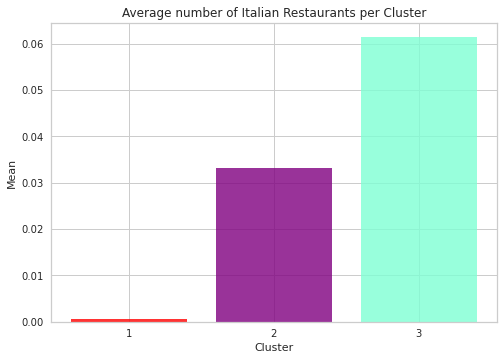

In [63]:
y_pos = np.arange(len(ticker))
perf = data_means
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, ticker)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Italian Restaurants per Cluster')

plt.show()

In [90]:
cluster1 = mex_merged[mex_merged['Cluster Labels'] == 0]
cluster1

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Italian Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,0.00
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,0.00
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,0.00
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,0.00
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0,0.00
61,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,0.00
62,M5N,Central Toronto,Roselawn,43.711695,-79.416936,0,0.00
67,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0,0.00
68,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,0,0.00
73,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,0,0.00


## We super-impose our cluster 1 locations on the map of Toronto to get a better visual

In [91]:
map_clusters = folium.Map(location=[43.651070,-79.347015], zoom_start=11) #inserting location of toronto 

# set color scheme for the clusters
x = np.arange(kcluster)
ys = [i + x + (i*x)**2 for i in range(kcluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster1['Latitude'], cluster1['Longitude'], cluster1['Neighborhood'], cluster1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters